# Comparação entre a quantidade de projetos criados e a quantidade de projetos finalizados no decorrer do tempo

**ISSUE:** [#19](https://github.com/lappis-unb/salic-ml/issues/19)

**Objetivo:** Identificar para cada ano quantos projetos são criados no Salic e quantos projetos são finalizados, onde um projeto finalizado pode ser tanto um projeto que foi concluído 100% quanto um projeto que acabou no meio do processo.

## Prepararando os dados

**Recarregar automaticamente os módulos.**

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Importando módulos python.**

In [12]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from salicml.utils.dates import Dates
from salicml.models.projects import Projects

PROJECT_ROOT = os.path.abspath(os.path.join(os.pardir, os.pardir))
DATA_FOLDER = os.path.join(PROJECT_ROOT, 'data', 'raw')

**Carregando os dados da tabela de Projetos.**

In [13]:
cols = ['IdPRONAC', 'DtProtocolo', 'Situacao', 'DtSituacao']
projects_csv = os.path.join(DATA_FOLDER, 'projetos.csv')

projects = Projects(projects_csv)

df_projects = projects.data_frame.filter(items = cols)
display(df_projects.head())

,IdPRONAC,DtProtocolo,Situacao,DtSituacao
0,1,2008-09-12 00:00:00,E63,2011-10-25 15:52:33
1,2,2008-09-12 00:00:00,G43,2008-11-19 00:00:00
2,3,2008-09-12 00:00:00,K00,2008-10-14 00:00:00
3,4,2008-09-03 00:00:00,E25,2017-07-27 11:47:56
4,5,2008-09-12 00:00:00,E36,2010-12-06 13:19:12


## Definindo quais anos estarão na análise

A análise desse notebook irá utilizar o período de 2009 até 2017.

In [14]:
initial_year = 2009
final_year   = 2017

years = [i for i in range(initial_year, final_year + 1)]

## Identificando quantos projetos foram criados em cada ano

Analisando o banco de dados do Salic a coluna que mais se enquadrou como uma data de criação de um projeto foi a coluna 'DtProcolo', logo essa será a coluna utilizada para analisar em qual ano o projeto foi criado.

Identificado quantos projetos foram criados em cada ano no período da análise.

In [15]:
created_projects = []

for year in years:
    project_created_after_begin_year = df_projects['DtProtocolo'] >= '{}-01-01'.format(year)
    project_created_before_end_year = df_projects['DtProtocolo'] <= '{}-12-31'.format(year)
    
    created_projects_filter = project_created_after_begin_year & project_created_before_end_year
    
    created_projects.append(len(df_projects[created_projects_filter]))

Tabela apresentando quantos projetos foram criados por ano.

In [16]:
data = {'Ano': years, 'Projetos Criados': created_projects}
df_created_projects = pd.DataFrame(data = data)
display(df_created_projects)

,Ano,Projetos Criados
0,2009,9181
1,2010,13532
2,2011,14068
3,2012,10016
4,2013,11534
5,2014,14419
6,2015,11274
7,2016,5097
8,2017,9422


Gráfico apresentando quantos projetos foram criados por ano.

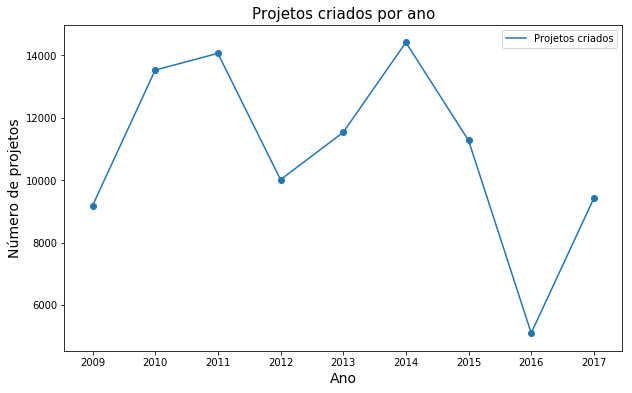

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

plt.plot(years, created_projects)
plt.scatter(years, created_projects)

plt.legend(['Projetos criados'], loc='best')
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Número de projetos', fontsize = 14)
plt.title('Projetos criados por ano', fontsize = 15)
plt.show()

## Identificando quantos projetos foram finalizados em cada ano

Não foi encontrado no banco de dados do Salic a data de finalização de um projeto, porém foi identificado que essa informação pode ser obtida através da situação de um projeto.

Cada projeto no banco de dados do Salic possui uma situação, que é uma sigla que indica a situação do projeto, 
analisando o banco de dados e através de troca de mensagens e e-mails com o pessoal que desenvolve o Salic e
o pessoal do ministério, foram identificadas situações que indicam que o projeto foi finalizado, os resultados
das mensagens e dos e-mails estão documentados na [issue](https://github.com/lappis-unb/salic-ml/issues/19).

As seguintes situações indicam que um projeto foi finalizado

In [25]:
end_situations = ['A09', 'A13', 'A14', 'A16', 'A17', 'A18', 'A20', 'A23', 'A24', 'A26', 'A40', 'A41',
                  'A42', 'C09', 'D18', 'E04', 'E09', 'E36', 'E47', 'E49', 'E63', 'E64', 'E65', 'G16', 'G25',
                  'G26', 'G29', 'G30', 'G56', 'K00', 'K01', 'K02', 'L01', 'L02', 'L03', 'L04', 'L05', 
                  'L06', 'L08', 'L09', 'L10', 'L11']

Definindo filtro para identificar quais projetos possuem a situação de finalizado.

In [26]:
filter_end_situation = df_projects['Situacao'].isin(end_situations)

Identificado quantos projetos foram finalizados em cada ano no período da análise.

Para identificar o ano em que o projeto foi finalizado será utilizado a coluna 'DtSituacao' da tabela 'Projetos', pois já que se possui os projetos com a situação de finalizado a data dessa situação indica quando o projeto foi finalizado.

In [27]:
finished_projects = []

for year in years:
    project_finished_after_begin_year = df_projects['DtSituacao'] >= '{}-01-01'.format(year)
    project_finished_before_end_year = df_projects['DtSituacao'] <= '{}-12-31'.format(year)
    
    finished_projects_filter = (filter_end_situation & 
                                project_finished_after_begin_year & 
                                project_finished_before_end_year)
    
    finished_projects.append(len(df_projects[finished_projects_filter]))

Tabela apresentando quantos projetos foram finalizados por ano.

In [28]:
data = {'Ano': years, 'Projetos Finalizados': finished_projects}
df_finished_projects = pd.DataFrame(data = data)
display(df_finished_projects)

,Ano,Projetos Finalizados
0,2009,5923
1,2010,5708
2,2011,7212
3,2012,6483
4,2013,5650
5,2014,5229
6,2015,6748
7,2016,2919
8,2017,6495


Gráfico apresentando quantos projetos foram finalizados por ano.

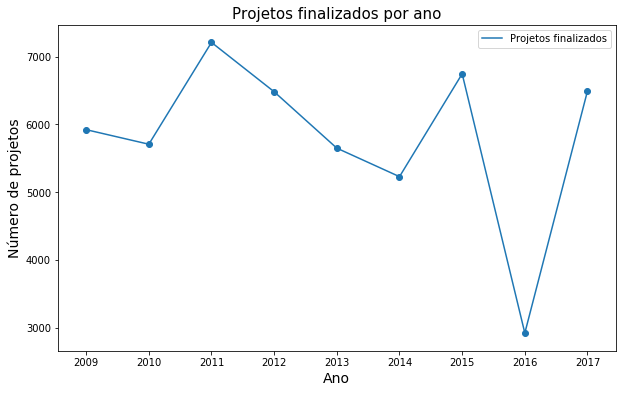

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

plt.plot(years, finished_projects)
plt.scatter(years, finished_projects)

plt.legend(['Projetos finalizados'], loc='best')
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Número de projetos', fontsize = 14)
plt.title('Projetos finalizados por ano', fontsize = 15)
plt.show()

## Comparação da quantidade de projetos criados vs projetos finalizados

Gráfico comparando a quantidade de projetos criados e finalizados

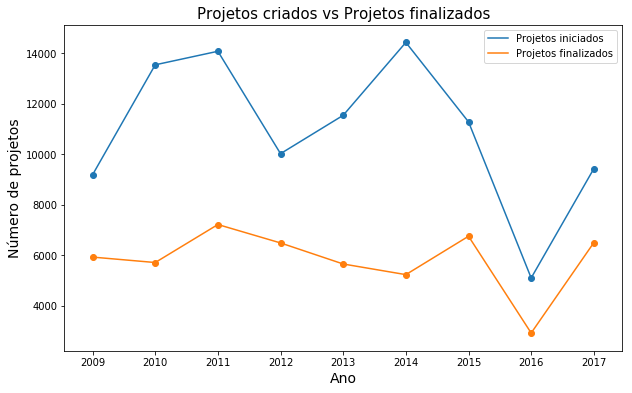

In [32]:
from scipy.interpolate import interp1d

#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

plt.plot(years, created_projects)
plt.plot(years, finished_projects)
plt.scatter(years, created_projects)
plt.scatter(years, finished_projects)

plt.legend(['Projetos iniciados', 'Projetos finalizados'], loc='best')
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Número de projetos', fontsize = 14)
plt.title('Projetos criados vs Projetos finalizados', fontsize = 15)
plt.show()

Tabela comparando a porcentagem de projetos criados e finalizados em relação ao ano anterior

In [36]:
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

created_projects_percentage = [0] + [(created_projects[i] - created_projects[i - 1]) * 100 / created_projects[i - 1] for i in range(1, len(created_projects))]
finished_projects_percentage = [0] + [(finished_projects[i] - finished_projects[i - 1]) * 100 / finished_projects[i - 1] for i in range(1, len(finished_projects))]

data = {'Ano': years, 'Projetos Criados': created_projects, 'Projetos Criados %': created_projects_percentage,
        'Projetos Fechados': finished_projects, 'Projetos Fechados %': finished_projects_percentage}

data_frame = pd.DataFrame(data = data)

subset = pd.IndexSlice[:, ['Projetos Criados %', 'Projetos Fechados %']]

data_frame = data_frame.style.applymap(color_negative_red, subset = subset)

display(data_frame)

,Ano,Projetos Criados,Projetos Criados %,Projetos Fechados,Projetos Fechados %
0,2009,9181,0,5923,0
1,2010,13532,47.3914,5708,-3.62992
2,2011,14068,3.96098,7212,26.349
3,2012,10016,-28.803,6483,-10.1082
4,2013,11534,15.1558,5650,-12.849
5,2014,14419,25.013,5229,-7.45133
6,2015,11274,-21.8115,6748,29.0495
7,2016,5097,-54.7898,2919,-56.7427
8,2017,9422,84.8538,6495,122.508


## Conclusão

A quantidade de projetos finalizados é sempre menor do que a quantidade de projetos criados no Salic, além de que a porcentagem de projetos finalizados em relação ao ano anterior teve mais quedas em relação aos projetos criados, ou seja além de todo ano ter projetos novos para serem analisados sempre tem uma carga de projetos de anos anteriores para serem analizados, indicando que se essa projeção continuar os projetos criados no ano vigente terão a tendencia de talvez nunca serem analisados ou demorar tanto que a sua análise não irá implicar em resultados.